In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../DATA/lending_club_loan_two.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 396030, dtype: object

In [7]:
df['term'] = df['term'].apply(lambda term : 36 if term.strip().startswith('36') else 60)

In [8]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
df['loan_status'].nunique()

2

In [12]:
df.corr()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
term,0.393862,1.000000,0.434594,0.153378,0.060330,0.036508,0.079575,-0.018758,0.084787,0.055166,0.101346,0.096220,-0.019826
int_rate,0.168921,0.434594,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.153378,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,0.060330,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.036508,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.079575,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,-0.018758,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,0.084787,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.055166,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751


<AxesSubplot:>

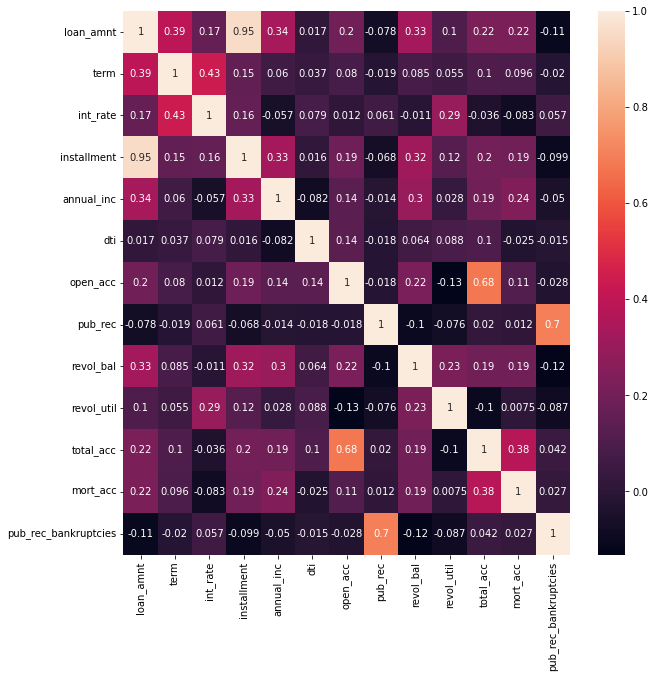

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

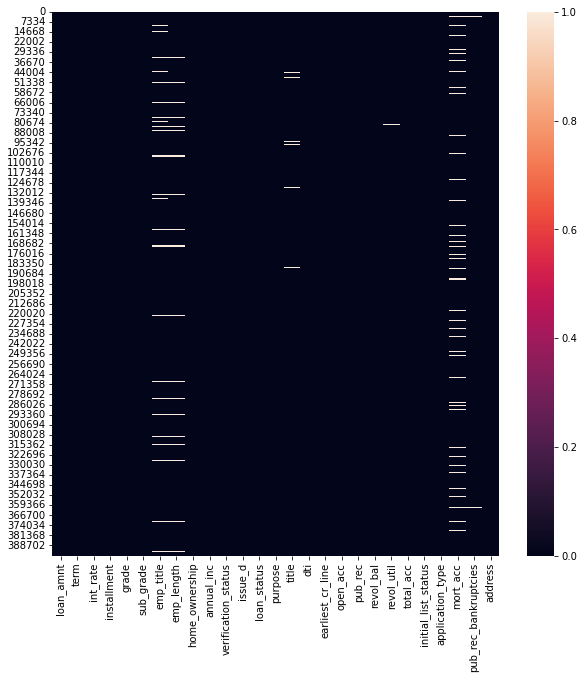

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [16]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [17]:
df['loan_status']=df['loan_status'].apply(lambda loan_status : 1 if loan_status =='Fully Paid' else 0)

In [18]:
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
sorted_g = sorted(df['grade'].unique())
sorted_g

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<AxesSubplot:xlabel='grade', ylabel='count'>

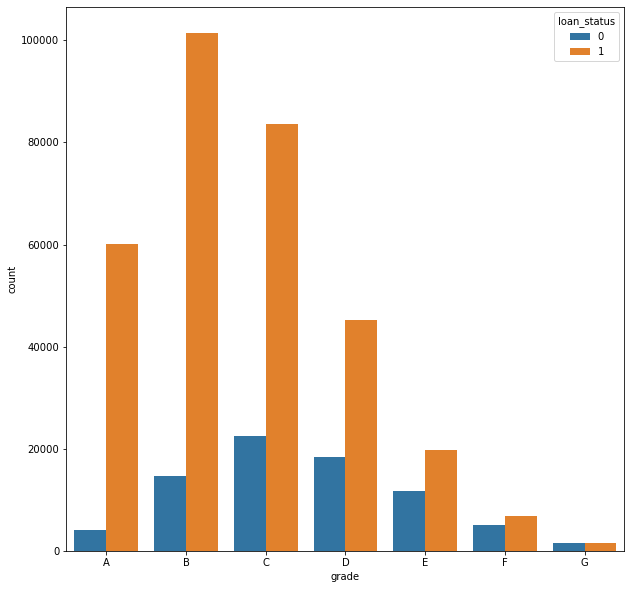

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='grade',hue='loan_status',order=sorted(df['grade'].unique()),data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

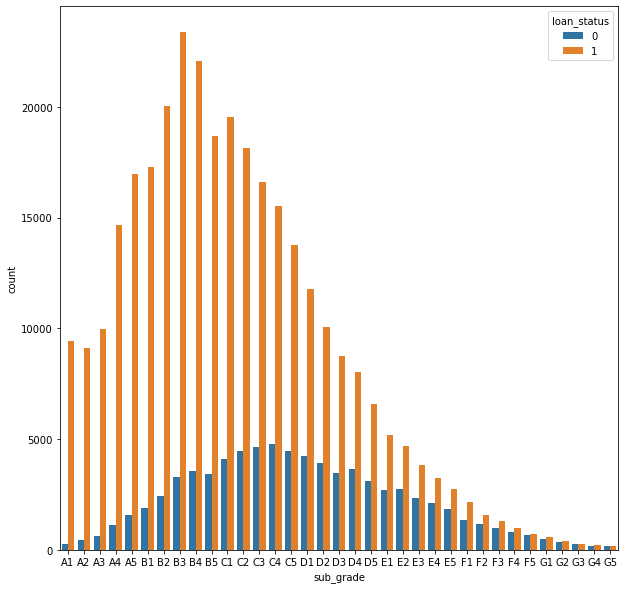

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='sub_grade',hue='loan_status',order=sorted(df['sub_grade'].unique()),data=df)

In [23]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [25]:
df.drop('grade',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [27]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [28]:
df['emp_title'].nunique()

173105

In [29]:
df.drop('emp_title',axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

<AxesSubplot:xlabel='emp_length', ylabel='count'>

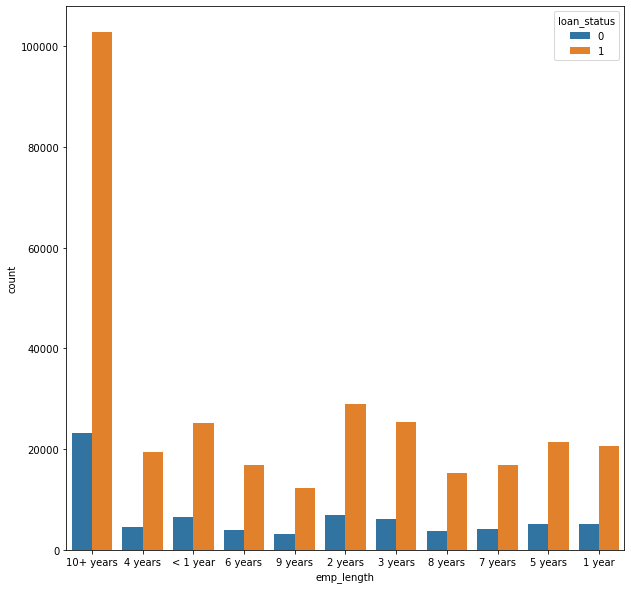

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='emp_length',hue='loan_status',data=df)

In [32]:
df['emp_length'].isna().count()

396030

In [33]:
df['emp_length'].fillna('others',inplace=True)

In [34]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       'others'], dtype=object)

In [35]:
df['emp_length'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: emp_length, Length: 396030, dtype: bool

<AxesSubplot:xlabel='emp_length', ylabel='count'>

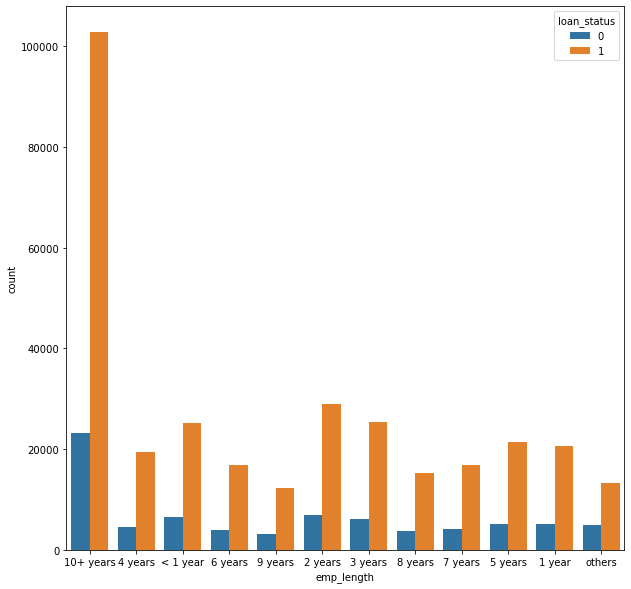

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(x='emp_length',hue='loan_status',data=df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [38]:
df.drop('emp_length',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   loan_status           396030 non-null  int64  
 10  purpose               396030 non-null  object 
 11  title                 394275 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [40]:
df['home_ownership'].nunique()

6

In [41]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

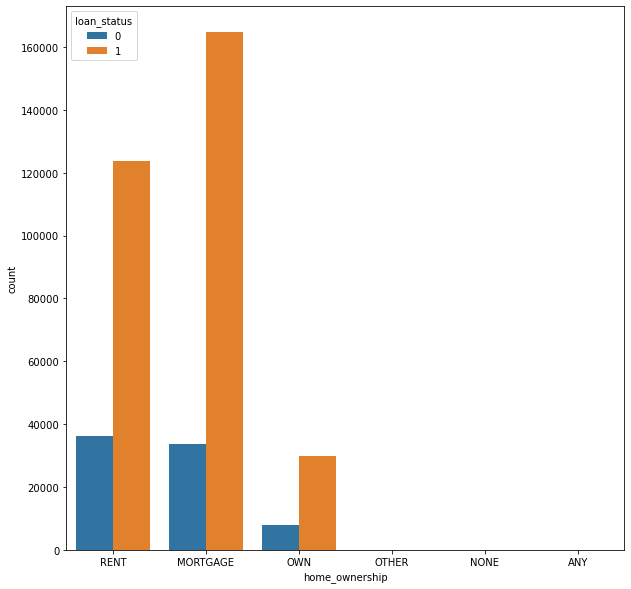

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership',hue='loan_status',data=df)

In [43]:
df['home_ownership'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: home_ownership, Length: 396030, dtype: bool

In [44]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

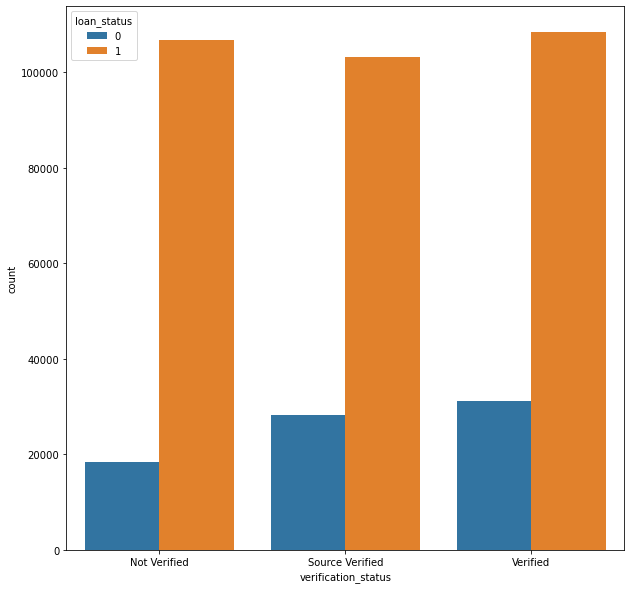

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='verification_status',hue='loan_status',data=df)

In [46]:
dummy_ver_stat = pd.get_dummies(df['verification_status'])

In [47]:
dummy_ver_stat

,Not Verified,Source Verified,Verified
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,0,1
396028,0,0,1


In [48]:
df = pd.concat([df,dummy_ver_stat],axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   loan_status           396030 non-null  int64  
 10  purpose               396030 non-null  object 
 11  title                 394275 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [50]:
df.drop('verification_status',axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [52]:
df['address'] = df['address'].apply(lambda address: address.strip()[-5:])

In [53]:
df['address']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [55]:
df['address'] = df['address'].apply(lambda address : float(address))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [57]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

<AxesSubplot:xlabel='application_type', ylabel='count'>

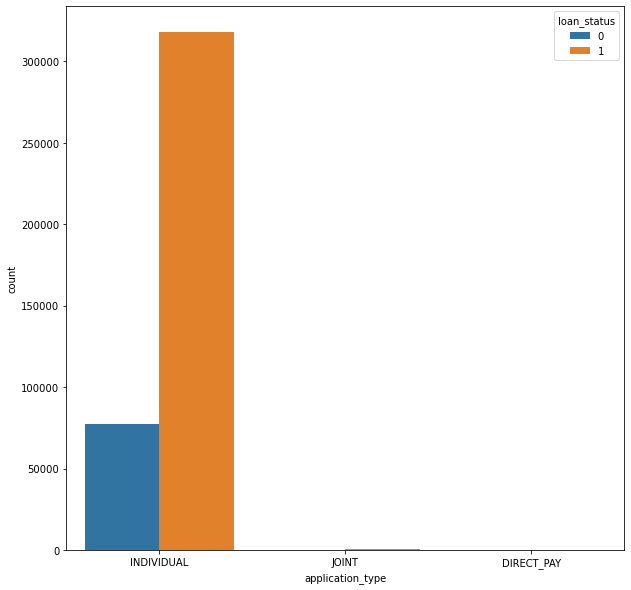

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x='application_type',hue='loan_status',data=df)

In [59]:
perc_not_paid = df[df['loan_status']==0].groupby('application_type').count()['loan_status']

In [60]:
perc_not_paid

application_type
DIRECT_PAY      102
INDIVIDUAL    77517
JOINT            54
Name: loan_status, dtype: int64

In [61]:
perc_paid = df[df['loan_status']==1].groupby('application_type').count()['loan_status']

In [62]:
perc_paid

application_type
DIRECT_PAY       184
INDIVIDUAL    317802
JOINT            371
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='application_type'>

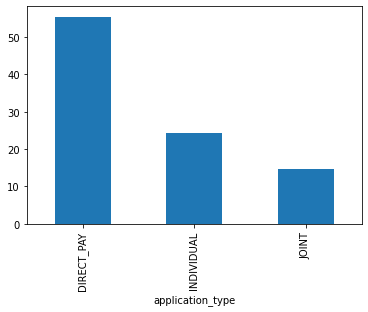

In [63]:
((perc_not_paid/perc_paid)*100).plot(kind='bar')

In [64]:
dummy_application_type = pd.get_dummies(df['application_type'])

In [65]:
dummy_application_type

,DIRECT_PAY,INDIVIDUAL,JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,1,0
396028,0,1,0


In [66]:
df = pd.concat([df,dummy_application_type],axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [68]:
df.drop('application_type',axis=1,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [70]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

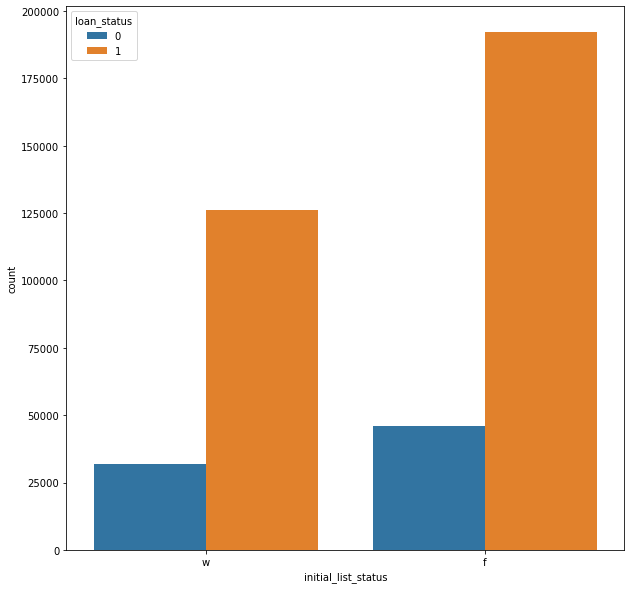

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(x='initial_list_status',hue='loan_status',data=df)

In [72]:
perc_not_paid = df[df['loan_status']==0].groupby('initial_list_status').count()['loan_status']

In [73]:
perc_not_paid

initial_list_status
f    45961
w    31712
Name: loan_status, dtype: int64

In [74]:
perc_paid = df[df['loan_status'] == 1].groupby('initial_list_status').count()['loan_status']
perc_paid

initial_list_status
f    192105
w    126252
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='initial_list_status'>

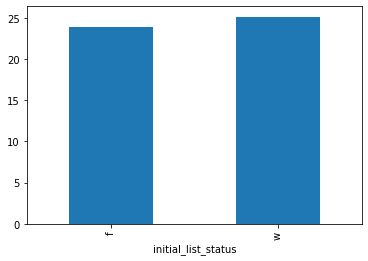

In [75]:
((perc_not_paid/perc_paid)*100).plot(kind='bar')

In [76]:
dummy_initial_list_status = pd.get_dummies(df['initial_list_status'])

In [77]:
dummy_initial_list_status

,f,w
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
396025,0,1
396026,1,0
396027,1,0
396028,1,0


In [78]:
df = pd.concat([df,dummy_initial_list_status],axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [80]:
df.drop('initial_list_status',axis=1,inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [82]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

<AxesSubplot:xlabel='earliest_cr_line', ylabel='count'>

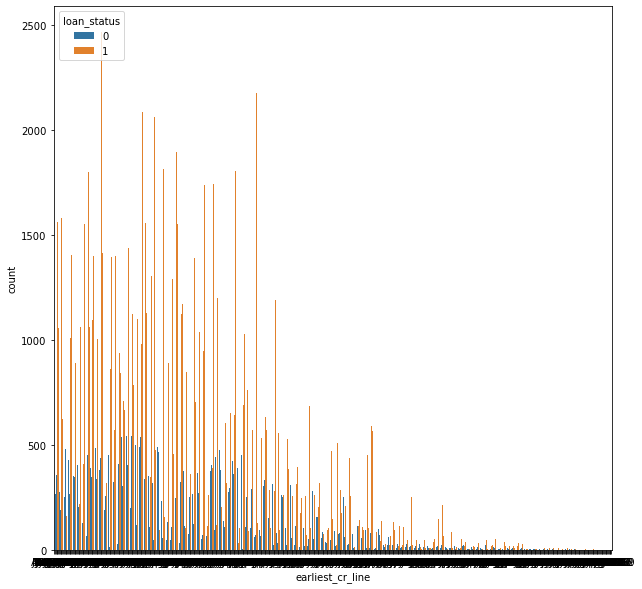

In [83]:
plt.figure(figsize=(10,10))
sns.countplot(x='earliest_cr_line',hue='loan_status',data=df)

In [84]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [85]:
df['title'].nunique()

48817

In [86]:
df['title'].isna().sum()

1755

In [87]:
df['title'].fillna('others',inplace=True)

In [88]:
df['title'].isna().sum()

0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [90]:
plt.figure(figsize=(10,10))
sns.countplot(x='title',hue='loan_status',data=df)

<AxesSubplot:xlabel='title', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ValueError: 
Consolidating at a lower rate to save $$
                                      ^
Expected end of text, found '$'  (at char 38), (line:1, col:39)

<Figure size 720x720 with 1 Axes>

In [91]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [92]:
df['purpose'].isna().sum()

0

<AxesSubplot:xlabel='purpose', ylabel='count'>

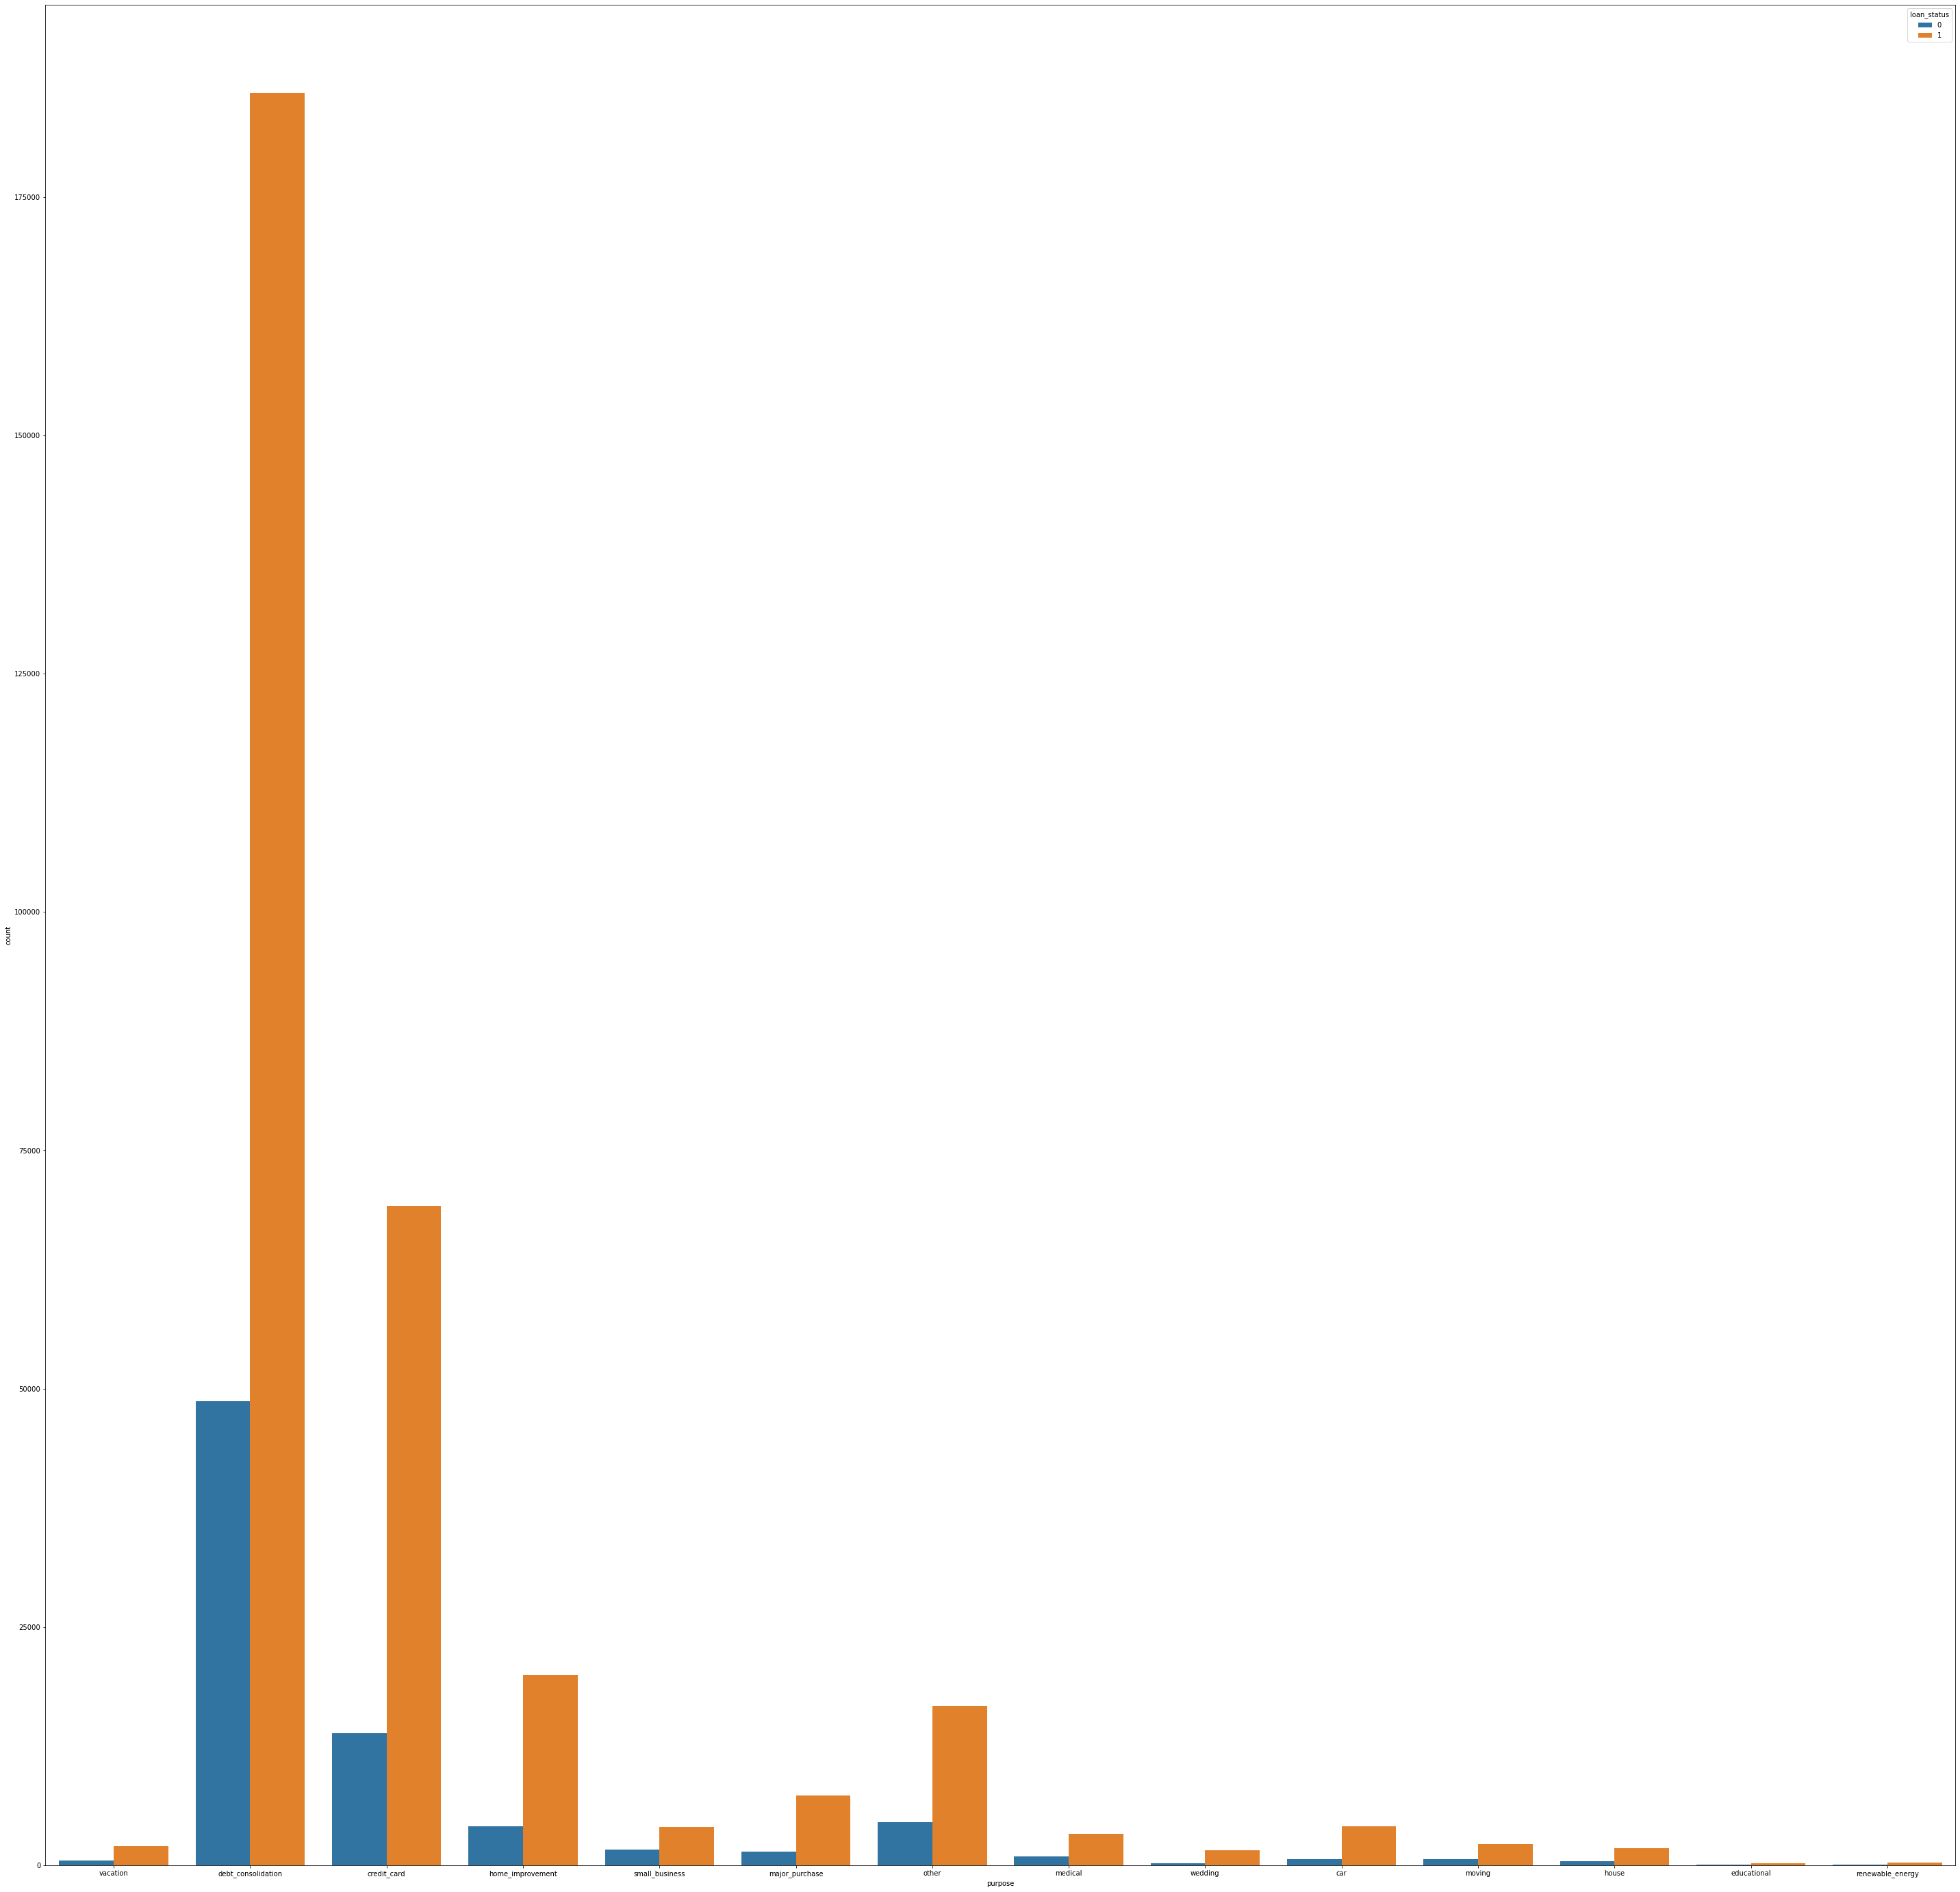

In [93]:
plt.figure(figsize=(50,50))
sns.countplot(x='purpose',hue='loan_status',data=df)

In [94]:
perc_not_paid = df[df['loan_status']==0].groupby('purpose').count()['loan_status']
perc_not_paid

purpose
car                     633
credit_card           13874
debt_consolidation    48640
educational              42
home_improvement       4087
house                   434
major_purchase         1448
medical                 911
moving                  670
other                  4495
renewable_energy         77
small_business         1679
vacation                464
wedding                 219
Name: loan_status, dtype: int64

In [95]:
perc_paid = df[df['loan_status']==1].groupby('purpose').count()['loan_status']
perc_paid

purpose
car                     4064
credit_card            69145
debt_consolidation    185867
educational              215
home_improvement       19943
house                   1767
major_purchase          7342
medical                 3285
moving                  2184
other                  16690
renewable_energy         252
small_business          4022
vacation                1988
wedding                 1593
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='purpose'>

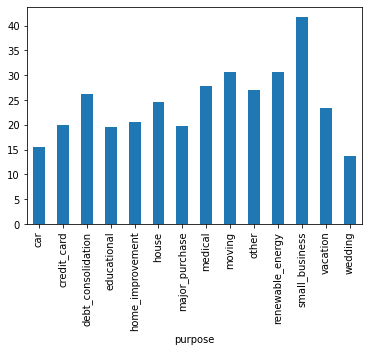

In [96]:
((perc_not_paid/perc_paid)*100).plot(kind='bar')

<AxesSubplot:xlabel='purpose'>

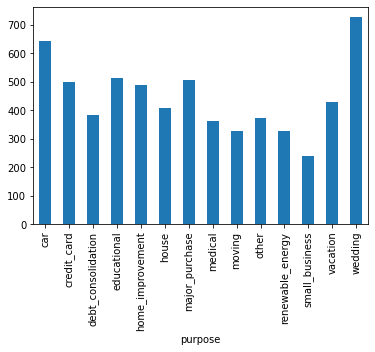

In [97]:
((perc_paid/perc_not_paid)*100).plot(kind='bar')

In [98]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [99]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [100]:
df['home_ownership'].isna().sum()

0

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

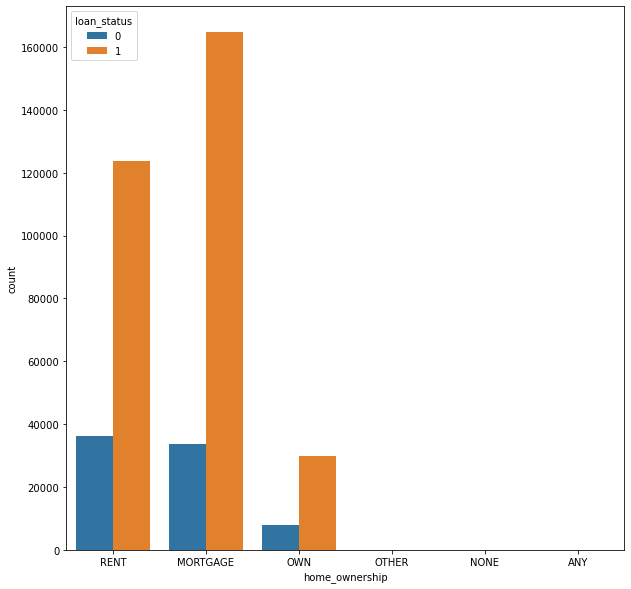

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership',hue='loan_status',data=df)

In [102]:
perc_not_paid = df[df['loan_status']==0].groupby('home_ownership').count()['loan_status']
perc_not_paid

home_ownership
MORTGAGE    33632
NONE            7
OTHER          16
OWN          7806
RENT        36212
Name: loan_status, dtype: int64

In [103]:
perc_paid = df[df['loan_status']==1].groupby('home_ownership').count()['loan_status']
perc_paid

home_ownership
ANY              3
MORTGAGE    164716
NONE            24
OTHER           96
OWN          29940
RENT        123578
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='home_ownership'>

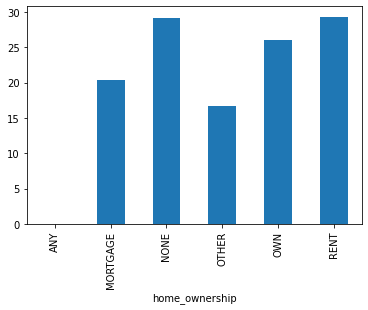

In [104]:
((perc_not_paid/perc_paid)*100).plot(kind='bar')

<AxesSubplot:xlabel='home_ownership'>

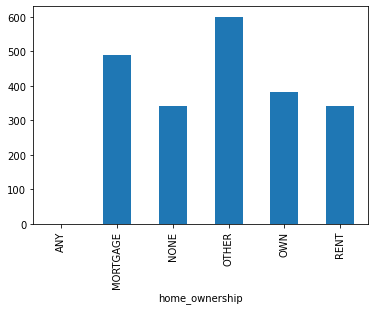

In [105]:
((perc_paid/perc_not_paid)*100).plot(kind='bar')

In [106]:
dummy_home_ownership = pd.get_dummies(df['home_ownership'])

In [107]:
dummy_home_ownership

,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
396025,0,0,0,0,0,1
396026,0,1,0,0,0,0
396027,0,0,0,0,0,1
396028,0,1,0,0,0,0


In [108]:
df = pd.concat([df,dummy_home_ownership],axis=1)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  object 
 10  title                 396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [110]:
df.drop('home_ownership',axis=1,inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   issue_d               396030 non-null  object 
 7   loan_status           396030 non-null  int64  
 8   purpose               396030 non-null  object 
 9   title                 396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  